In [39]:
from llm_council.topologies.council import LanguageModelCouncil
from dotenv import load_dotenv

# Test openrouter

In [8]:
load_dotenv()

True

In [28]:
import os
from openai import OpenAI, AsyncOpenAI

api_key = os.getenv("OPENROUTER_API_KEY")

client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=api_key,
)


In [17]:
client

In [27]:
class CalendarEvent(BaseModel):
    name: str
    date: str
    participants: list[str]

In [22]:
completion = client.beta.chat.completions.parse(
    model="deepseek/deepseek-r1-0528",
    messages=[
        {"role": "system", "content": "Extract the event information."},
        {"role": "user", "content": "Alice and Bob are going to a science fair on Friday."},
    ],
    response_format=CalendarEvent,
)

BadRequestError: Error code: 400 - {'error': {'message': 'invalid model ID', 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [29]:
completion = client.chat.completions.create(
    model="deepseek/deepseek-r1-0528",
    messages=[
        {"role": "system", "content": "Extract the event information."},
        {"role": "user", "content": "Alice and Bob are going to a science fair on Friday."},
    ],
)

In [30]:
completion.choices[0].message.content

'Based on the provided statement, here is the extracted event information:\n\n- **Event**: Science fair  \n- **Attendees**: Alice and Bob  \n- **Day**: Friday  \n\n**Note**:  \n- The specific date (e.g., calendar date), time, location, and duration are not provided in the statement.  \n- Only the day of the week ("Friday") is mentioned, so the exact date would depend on the current week context.'

In [ ]:
completion = client.beta.chat.completions.parse(
    model="google/gemini-2.5-flash-preview-05-20",
    messages=[
        {"role": "system", "content": "Extract the event information."},
        {"role": "user", "content": "Alice and Bob are going to a science fair on Friday."},
    ],
    response_format=CalendarEvent,
)

In [36]:
completion.choices[0].message.parsed

CalendarEvent(name='science fair', date='Friday', participants=['Alice', 'Bob'])

In [38]:
completion.usage

CompletionUsage(completion_tokens=22, prompt_tokens=28, total_tokens=50, completion_tokens_details=None, prompt_tokens_details=None)

## Council testing

In [1]:
from llm_council.topologies.council import LanguageModelCouncil
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
lmc = LanguageModelCouncil(
    models=[
        "google/gemini-2.5-flash-preview-05-20",
        # "deepseek/deepseek-r1-0528",
        "meta-llama/llama-3.1-8b-instruct",
    ]
)

completions, judgements = await lmc.execute_notebook(prompt="Say hello.")

100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
/Users/justinzhao/Repos/llm-council-public/llm_council/topologies/council.py:471: RuntimeWarning: coroutine 'LanguageModelCouncil.get_judge_pairwise_rating_tasks_for_single_prompt' was never awaited
  tasks.extend(


TypeError: 'coroutine' object is not iterable

In [4]:
completions

,user_prompt,llm,completion_text,completion_tokens,prompt_tokens,total_tokens
0,Say hello.,Llama-3.1-8B,Hello. How can I assist you today?,10,38,48
1,Say hello.,openai://gpt-4o,Hello! How can I assist you today?,9,10,19
2,Say hello.,gpt-4o-mini,Hello! How can I assist you today?,9,10,19


In [5]:
judgements

,user_prompt,llm_judge,first_completion_by,second_completion_by,pairwise_choice,completion_tokens,prompt_tokens,total_tokens
0,Say hello.,Llama-3.1-8B,gpt-4o-mini,Llama-3.1-8B,A>>B,27,418,445
1,Say hello.,Llama-3.1-8B,Llama-3.1-8B,openai://gpt-4o,A>B,26,418,444
2,Say hello.,gpt-4o-mini,Llama-3.1-8B,openai://gpt-4o,B>A,10,280,290
3,Say hello.,Llama-3.1-8B,Llama-3.1-8B,gpt-4o-mini,A>B,26,418,444
4,Say hello.,openai://gpt-4o,openai://gpt-4o,Llama-3.1-8B,A>B,10,280,290
5,Say hello.,openai://gpt-4o,gpt-4o-mini,Llama-3.1-8B,A=B,10,280,290
6,Say hello.,Llama-3.1-8B,openai://gpt-4o,Llama-3.1-8B,A>>B,27,418,445
7,Say hello.,gpt-4o-mini,Llama-3.1-8B,gpt-4o-mini,B>A,10,280,290
8,Say hello.,gpt-4o-mini,openai://gpt-4o,Llama-3.1-8B,A=B,10,280,290
9,Say hello.,gpt-4o-mini,gpt-4o-mini,Llama-3.1-8B,A=B,10,280,290


In [6]:
completions, judgements = await lmc.execute_notebook(prompt="Say goodbye.")

100%|██████████| 3/3 [00:00<00:00,  4.09it/s]


Generated 18 pairwise comparison tasks.


100%|██████████| 18/18 [00:00<00:00, 19.19it/s]


In [7]:
completions

,user_prompt,llm,completion_text,completion_tokens,prompt_tokens,total_tokens
0,Say hello.,Llama-3.1-8B,Hello. How can I assist you today?,10,38,48
1,Say hello.,openai://gpt-4o,Hello! How can I assist you today?,9,10,19
2,Say hello.,gpt-4o-mini,Hello! How can I assist you today?,9,10,19
0,Say goodbye.,Llama-3.1-8B,Goodbye. It was nice chatting with you.,11,38,49
1,Say goodbye.,openai://gpt-4o,Goodbye! If you have any more questions in the...,22,10,32
2,Say goodbye.,gpt-4o-mini,"Goodbye! If you need anything in the future, f...",20,10,30


In [30]:
judgements

,user_prompt,llm_judge,first_completion_by,second_completion_by,pairwise_choice,completion_tokens,prompt_tokens,total_tokens
0,Say hello.,Llama-3.1-8B,gpt-4o-mini,Llama-3.1-8B,A>>B,27,418,445
1,Say hello.,Llama-3.1-8B,Llama-3.1-8B,openai://gpt-4o,A>B,26,418,444
2,Say hello.,Llama-3.1-8B,Llama-3.1-8B,gpt-4o-mini,A>B,26,418,444
3,Say hello.,Llama-3.1-8B,openai://gpt-4o,Llama-3.1-8B,A>>B,27,418,445
4,Say hello.,openai://gpt-4o,Llama-3.1-8B,gpt-4o-mini,B>A,10,280,290
5,Say hello.,openai://gpt-4o,Llama-3.1-8B,openai://gpt-4o,B>A,10,280,290
6,Say hello.,openai://gpt-4o,gpt-4o-mini,Llama-3.1-8B,A=B,10,280,290
7,Say hello.,gpt-4o-mini,Llama-3.1-8B,openai://gpt-4o,A=B,10,280,290
8,Say hello.,gpt-4o-mini,Llama-3.1-8B,gpt-4o-mini,A=B,10,280,290
9,Say hello.,openai://gpt-4o,openai://gpt-4o,Llama-3.1-8B,A=B,10,280,290


In [9]:
lmc.save("lmc_api_example_data")

## Load existing council

In [1]:
from llm_council.topologies.council import LanguageModelCouncil

lmc = LanguageModelCouncil.load("lmc_api_example_data")
judging_df = lmc.get_judgements()

## Start analysis

In [2]:
import os
from collections import defaultdict


analysis_outdir = "analysis/lmc_api"

analysis_consistent_votes_outdir = os.path.join(analysis_outdir, "consistent_votes")
analysis_all_votes_outdir = os.path.join(analysis_outdir, "all_votes")

os.makedirs(analysis_outdir, exist_ok=True)

analysis_subdirectories = [
    "bradley_terry",
    "explicit_win_rates",
    "agreement",
    "length_bias",
    "consistency_and_position_bias",
    "affinity",
    "rankings_and_separability",
]

# Store all subdirectories in a map.
analysis_subdir_map = defaultdict(dict)

# Make all subdirectories.
for subdir in analysis_subdirectories:
    all_votes_subdir = os.path.join(analysis_all_votes_outdir, subdir)
    consistent_votes_subdir = os.path.join(analysis_consistent_votes_outdir, subdir)

    os.makedirs(all_votes_subdir, exist_ok=True)
    os.makedirs(consistent_votes_subdir, exist_ok=True)

    analysis_subdir_map["consistent_votes"][subdir] = consistent_votes_subdir
    analysis_subdir_map["all_votes"][subdir] = all_votes_subdir


In [3]:
from llm_council.analysis.pairwise.consistency import get_consistent_votes
from llm_council.analysis.pairwise.bradley_terry import bradley_terry_analysis
from llm_council.analysis.visualization import plot_heatmap
import os

In [4]:
expected_win_rate_map

NameError: name 'expected_win_rate_map' is not defined

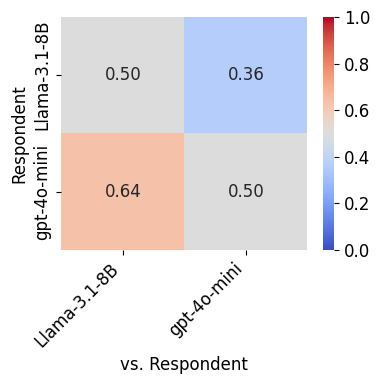

In [ ]:
# Consistent votes.
consistent_judging_df = get_consistent_votes(judging_df, example_id_column_name="user_prompt")

# Bradley-terry analysis.
expected_win_rate_map = bradley_terry_analysis(judging_df)
plot_heatmap(
    expected_win_rate_map,
    ylabel="Respondent",
    xlabel="vs. Respondent",
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    outfile=os.path.join(analysis_subdir_map["all_votes"]["bradley_terry"], "llm_vs_llm_win_rates.pdf"),
    figsize=(4,4),
    font_size=12,
)

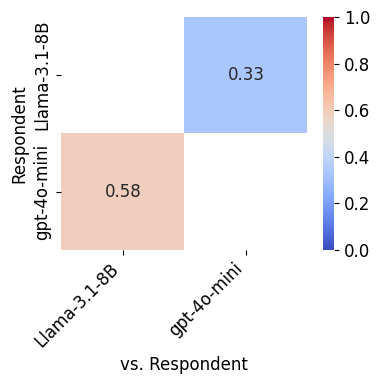

In [ ]:
from llm_council.analysis.pairwise.explicit_win_rate import get_explicit_win_rates

explicit_win_rates_df = get_explicit_win_rates(judging_df)
explicit_win_rates_consistent_df = get_explicit_win_rates(consistent_judging_df)

plot_heatmap(
    df=explicit_win_rates_df,
    outfile=os.path.join(analysis_subdir_map["all_votes"]["explicit_win_rates"], "llm_explicit_win_rate.pdf"),
    ylabel="Respondent",
    xlabel="vs. Respondent",
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    figsize=None,
    font_size=12,
)

In [5]:
plot_heatmap(
    df=explicit_win_rates_consistent_df,
    outfile=os.path.join(analysis_subdir_map["consistent_votes"]["explicit_win_rates"], "llm_explicit_win_rate.pdf"),
    ylabel="Respondent",
    xlabel="vs. Respondent",
    vmin=0,
    vmax=1,
    cmap="coolwarm",
    figsize=None,
    font_size=12,
)

NameError: name 'explicit_win_rates_consistent_df' is not defined

In [6]:
from llm_council.analysis.pairwise.agreement import get_judge_agreement_map

In [7]:
judge_agreement_map = get_judge_agreement_map(judging_df, example_id_column="user_prompt")
judge_agreement_map_consistent = get_judge_agreement_map(consistent_judging_df, example_id_column="user_prompt")

/Users/justinzhao/Repos/llm-council-public/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/justinzhao/Repos/llm-council-public/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/justinzhao/Repos/llm-council-public/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/justinzhao/Repos/llm-council-public/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:758: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/Users/justinzhao/Repos/llm-council-public/.venv/lib/pyt

NameError: name 'consistent_judging_df' is not defined

In [8]:
# Find mean agreement.
import pandas as pd

# Find mean agreement over all votes.
mean_agreement = {}
for agreement_method, judge_agreement_df in judge_agreement_map.items():
    mean_agreement[agreement_method] = judge_agreement_df.mean()
mean_agreement = pd.DataFrame(mean_agreement)

# Find mean agreement over consistent votes.
mean_agreement_consistent_votes = {}
for agreement_method, judge_agreement_df in judge_agreement_map_consistent.items():
    mean_agreement_consistent_votes[agreement_method] = judge_agreement_df.mean()
mean_agreement_consistent_votes = pd.DataFrame(mean_agreement_consistent_votes)

NameError: name 'judge_agreement_map_consistent' is not defined

In [9]:
mean_agreement

,cohen_kappa,exact,sidewise,sidewise_cohen_kappa
Llama-3.1-8B,0.437500,0.333333,0.416667,0.0
gpt-4o-mini,-0.083333,0.166667,0.416667,0.0
council (by majority vote),0.437500,0.500000,0.583333,0.0
council (by mean pooling),0.000000,0.333333,0.416667,NaN


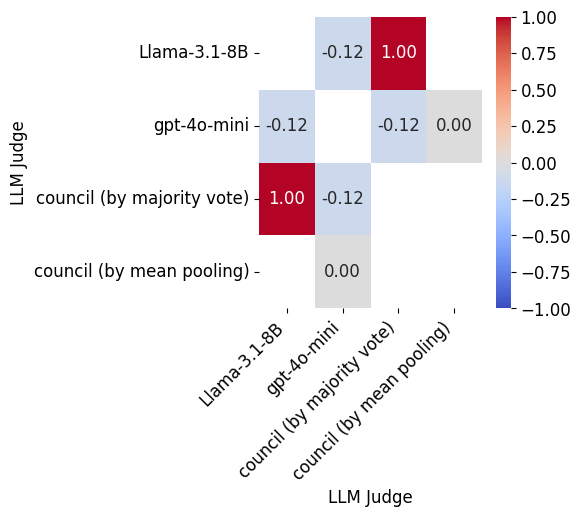

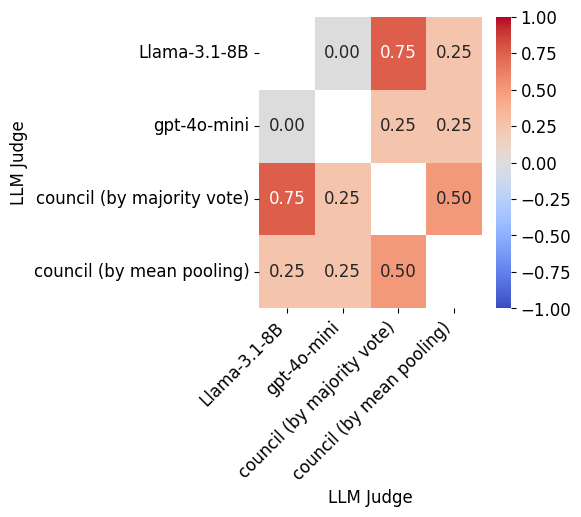

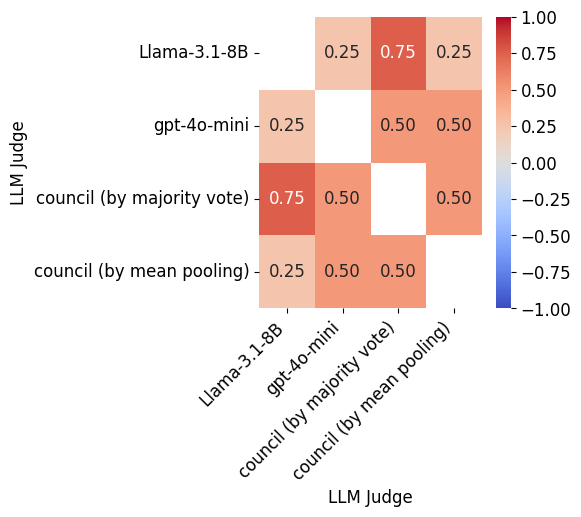

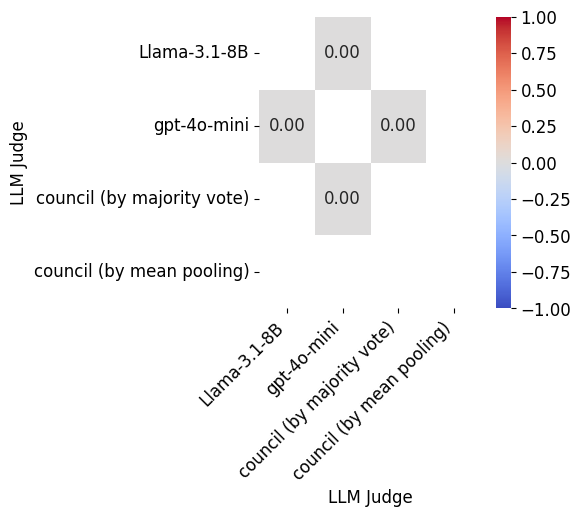

NameError: name 'judge_agreement_map_consistent' is not defined

In [10]:
# Heatmaps for agreement amongst all votes.
for agreement_method in judge_agreement_map.keys():
    plot_heatmap(
        df=judge_agreement_map[agreement_method],
        outfile=os.path.join(analysis_subdir_map["all_votes"]["agreement"], f"judge_agreement.{agreement_method}.pdf"),
        ylabel="LLM Judge",
        xlabel="LLM Judge",
        vmin=-1,
        vmax=1,
        figsize=None,
        font_size=12,
    )


# Heatmaps for agreement amongst consistent votes.
for agreement_method in judge_agreement_map_consistent.keys():
    plot_heatmap(
        df=judge_agreement_map[agreement_method],
        outfile=os.path.join(analysis_subdir_map["consistent_votes"]["agreement"], f"judge_agreement.{agreement_method}.pdf"),
        ylabel="LLM Judge",
        xlabel="LLM Judge",
        vmin=-1,
        vmax=1,
        figsize=None,
        font_size=12,
    )

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from llm_council.analysis.pairwise.length_bias import attach_num_words_to_judging_df, plot_length_based_outcomes
from llm_council.constants import (
    MAJOR_A_WIN,
    MINOR_A_WIN,
    MINOR_B_WIN,
    MAJOR_B_WIN,
    TIE,
)
import os

In [11]:
completions_df = lmc.get_completions()

In [12]:
from llm_council.analysis.pairwise.length_bias import get_respondent_token_counts

respondent_to_token_counts_df, id_respondent_to_num_words = get_respondent_token_counts(completions_df, example_id_column="user_prompt", llm_text_column="completion_text", llm_responder_column="llm")

In [13]:
completions_df

,user_prompt,llm,completion_text,completion_tokens,prompt_tokens,total_tokens
0,Say hello.,gpt-4o-mini,Hello! How can I assist you today?,9,10,19
1,Say hello.,Llama-3.1-8B,Hello. How can I assist you today?,10,38,48
2,Say goodbye.,Llama-3.1-8B,Goodbye. It was nice chatting with you.,11,38,49
3,Say goodbye.,gpt-4o-mini,Goodbye! If you ever need anything or want to ...,22,10,32


In [14]:
respondent_to_token_counts_profile = respondent_to_token_counts_df.describe().T
formatted_series = (
    respondent_to_token_counts_profile["mean"].astype(int).astype(str)
    + " ± "
    + respondent_to_token_counts_profile["std"].astype(int).astype(str)
)
print("Respondent token counts (words):")
print("--------------------------------")
print(formatted_series)

Respondent token counts (words):
--------------------------------
gpt-4o-mini     12 ± 7
Llama-3.1-8B     7 ± 0
dtype: object


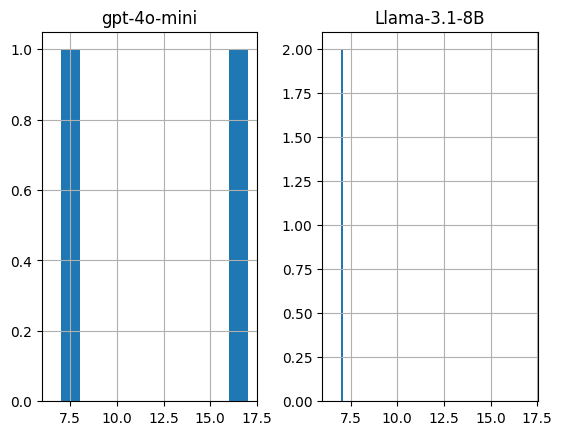

In [15]:
import matplotlib.pyplot as plt
import os


# Plot the distributions of the word counts of respondents.
plt.rcParams.update({"font.size": 10})
respondent_to_token_counts_df.hist(
    ylabelsize=10,
    xlabelsize=10,
    sharex=True,
)
plt.savefig(os.path.join(analysis_subdir_map["all_votes"]["length_bias"], "respondent_word_counts.pdf"))

In [16]:
# Plot outcomes as a function of word lengths.
from llm_council.analysis.pairwise.pairwise_utils import get_council_choice


def plot_outcomes_by_respondent_word_lengths(judging_df, outdir):
    # Everyone's votes.
    plot_length_based_outcomes(judging_df, "council (no aggregation)", id_respondent_to_num_words, show=True, outdir=outdir, example_id_column="user_prompt")
    
    # Majority vote.
    council_choice_majority = get_council_choice(judging_df, "majority", example_id_column="user_prompt")
    plot_length_based_outcomes(
        council_choice_majority, "council (by majority vote)", id_respondent_to_num_words, show=False, outdir=outdir,example_id_column="user_prompt"
    )
    
    # Mean pooling.
    council_choice_mean_pooling = get_council_choice(judging_df, "mean_pooling", example_id_column="user_prompt")
    plot_length_based_outcomes(
        council_choice_mean_pooling, "council (by mean pooling)", id_respondent_to_num_words, show=False, outdir=outdir,example_id_column="user_prompt"
    )
    
    # Individual LLM judges.
    for judge in judging_df["llm_judge"].unique():
        judge_choice = judging_df[judging_df["llm_judge"] == judge]
        plot_length_based_outcomes(
            judge_choice, judge, id_respondent_to_num_words, show=False, outdir=outdir, example_id_column="user_prompt"
        )

# Plot outcomes by respondent word lengths.
plot_outcomes_by_respondent_word_lengths(judging_df, analysis_subdir_map["all_votes"]["length_bias"])
plot_outcomes_by_respondent_word_lengths(consistent_judging_df, analysis_subdir_map["consistent_votes"]["length_bias"])

NameError: name 'plot_length_based_outcomes' is not defined

In [22]:
from llm_council.analysis.pairwise.length_bias import get_length_biases_df

# length_biases_consistent_votes_df = get_length_biases_df(consistent_judging_df, id_respondent_to_num_words, example_id_column="user_prompt")

length_biases_df = get_length_biases_df(judging_df, id_respondent_to_num_words, example_id_column="user_prompt")
length_biases_df.T

,length_bias
council (no aggregation),0.170213
council (majority vote),0.000000
council (mean pooling),0.666667
gpt-4o-mini,0.727273
Llama-3.1-8B,1.000000


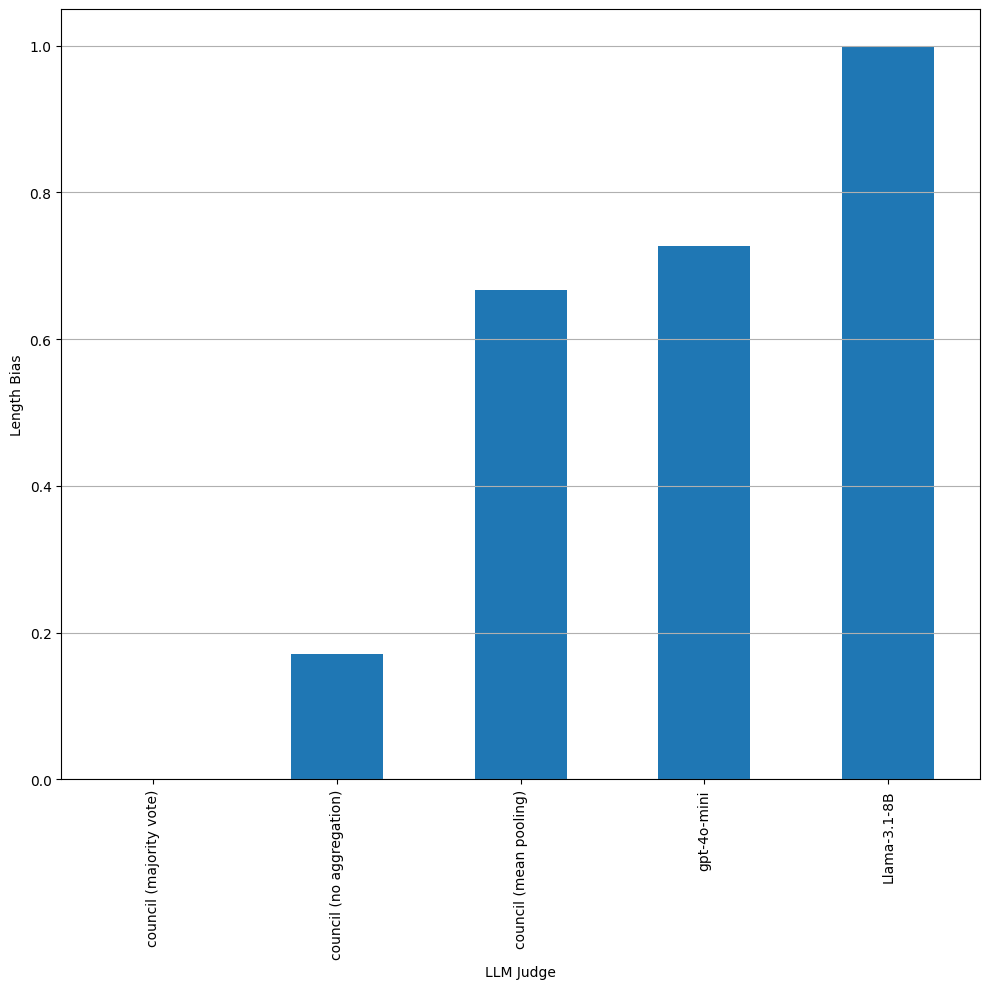

In [23]:
# Plot length bias.

def plot_length_bias_bar_graph(length_biases_df, outdir):
    length_biases_df = length_biases_df.T.sort_values("length_bias", ascending=True)
    length_biases_df.plot(kind="bar", figsize=(10, 10), legend=False)
    plt.xlabel("LLM Judge")
    plt.ylabel("Length Bias")
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "length_bias.pdf"))
    plt.show()
    plt.close()


plot_length_bias_bar_graph(length_biases_df, analysis_subdir_map["all_votes"]["length_bias"])
# plot_length_bias_bar_graph(length_biases_consistent_votes_df, analysis_subdir_map["consistent_votes"]["length_bias"])

In [20]:
from llm_council.analysis.pairwise.affinity import get_affinity_df

In [24]:
arbitrary_llm_respondent = judging_df["first_completion_by"].unique()[0]

affinity_results = get_affinity_df(judging_df, reference_llm_respondent=arbitrary_llm_respondent, example_id_column="user_prompt")
# affinity_results_consistent_votes = get_affinity_df(consistent_judging_df, reference_llm_respondent=arbitrary_llm_respondent, example_id_column="user_prompt")

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.float64(1.0)